In [1]:
from matplotlib import pyplot as plt
from lib.methods.cdeepso import CDEEPSO
from lib.methods.deepso import DEEPSO
from lib.functions.rastrigin import Rastrigin
from lib.functions.rosenbrock import Rosenbrock
from lib.functions.schwefel import Schwefel
from lib.functions.styblinski_tang import StyblinskiTang
from lib.functions.trid import Trid
from lib.functions.zakharov import Zakharov
from lib.utils.experiment import Experiment
from lib.utils.test import Test

In [2]:
n_inds = 30

functions = [Rastrigin, Rosenbrock, Schwefel, StyblinskiTang, Trid, Zakharov]
dims = [10, 30, 50, 100]

tests = []
n_samples = 30
n_iters = 100
n = 0

print('Teste | Função     | Dims | Algoritmo |    Média |   Desvio |   Mínimo |   Máximo |    Hipótese')
for func in functions:
    print('-' * 95)
    for n_dims in dims:
        F = func(n_dims=n_dims)
        e0 = Experiment(f'DEEPSO', DEEPSO, {
            'F': F,
            'n_inds': n_inds,
            'variant': 'Sg'
        })
        e1 = Experiment(f'C-DEEPSO', CDEEPSO, {
            'F': F,
            'n_inds': n_inds,
            'variant': 'rand'
        })
        tests.append(Test(n, [e0, e1], n_samples, n_iters, f'{F.name:10} | {n_dims:3}d').run())
        n += 1

Teste | Função     | Dims | Algoritmo |    Média |   Desvio |   Mínimo |   Máximo |    Hipótese
-----------------------------------------------------------------------------------------------
    0 | Rastrigin  |  10d |    DEEPSO | 1.84e+01 | 1.08e+01 | 3.58e+00 | 5.74e+01 | p=3.549e-01
    0 | Rastrigin  |  10d |  C-DEEPSO | 2.07e+01 | 8.49e+00 | 8.04e+00 | 4.17e+01 |   H0 accept
    1 | Rastrigin  |  30d |    DEEPSO | 1.28e+02 | 3.48e+01 | 3.88e+01 | 1.91e+02 | p=7.856e-03
    1 | Rastrigin  |  30d |  C-DEEPSO | 1.49e+02 | 2.45e+01 | 1.07e+02 | 1.98e+02 |   H0 reject
    2 | Rastrigin  |  50d |    DEEPSO | 2.68e+02 | 6.34e+01 | 1.19e+02 | 4.06e+02 | p=3.049e-03
    2 | Rastrigin  |  50d |  C-DEEPSO | 3.14e+02 | 4.91e+01 | 2.32e+02 | 4.21e+02 |   H0 reject
    3 | Rastrigin  | 100d |    DEEPSO | 6.41e+02 | 1.58e+02 | 2.87e+02 | 9.33e+02 | p=2.360e-05
    3 | Rastrigin  | 100d |  C-DEEPSO | 7.86e+02 | 6.27e+01 | 6.77e+02 | 9.13e+02 |   H0 reject
----------------------------------------

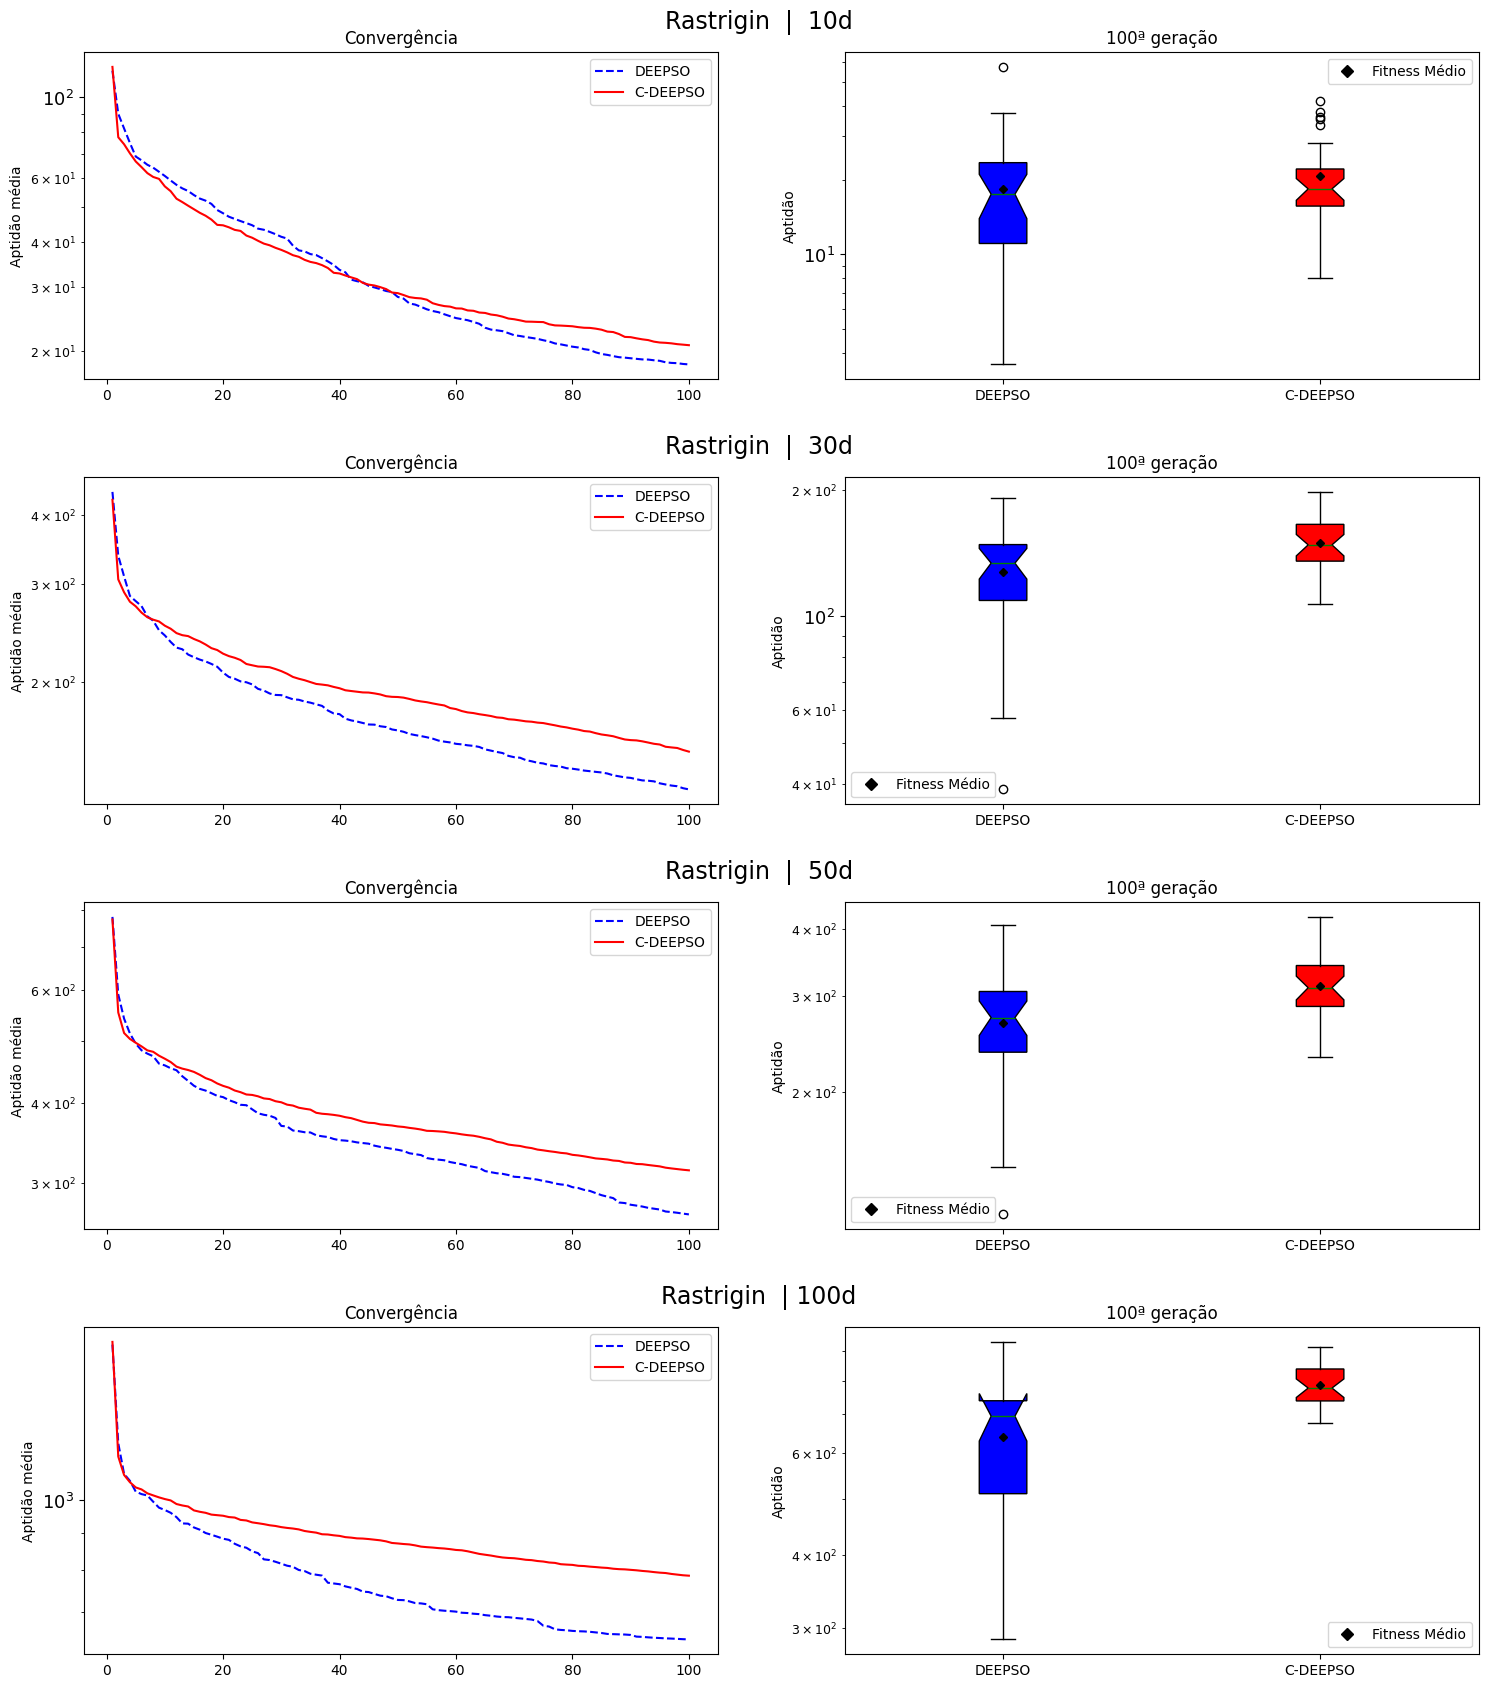

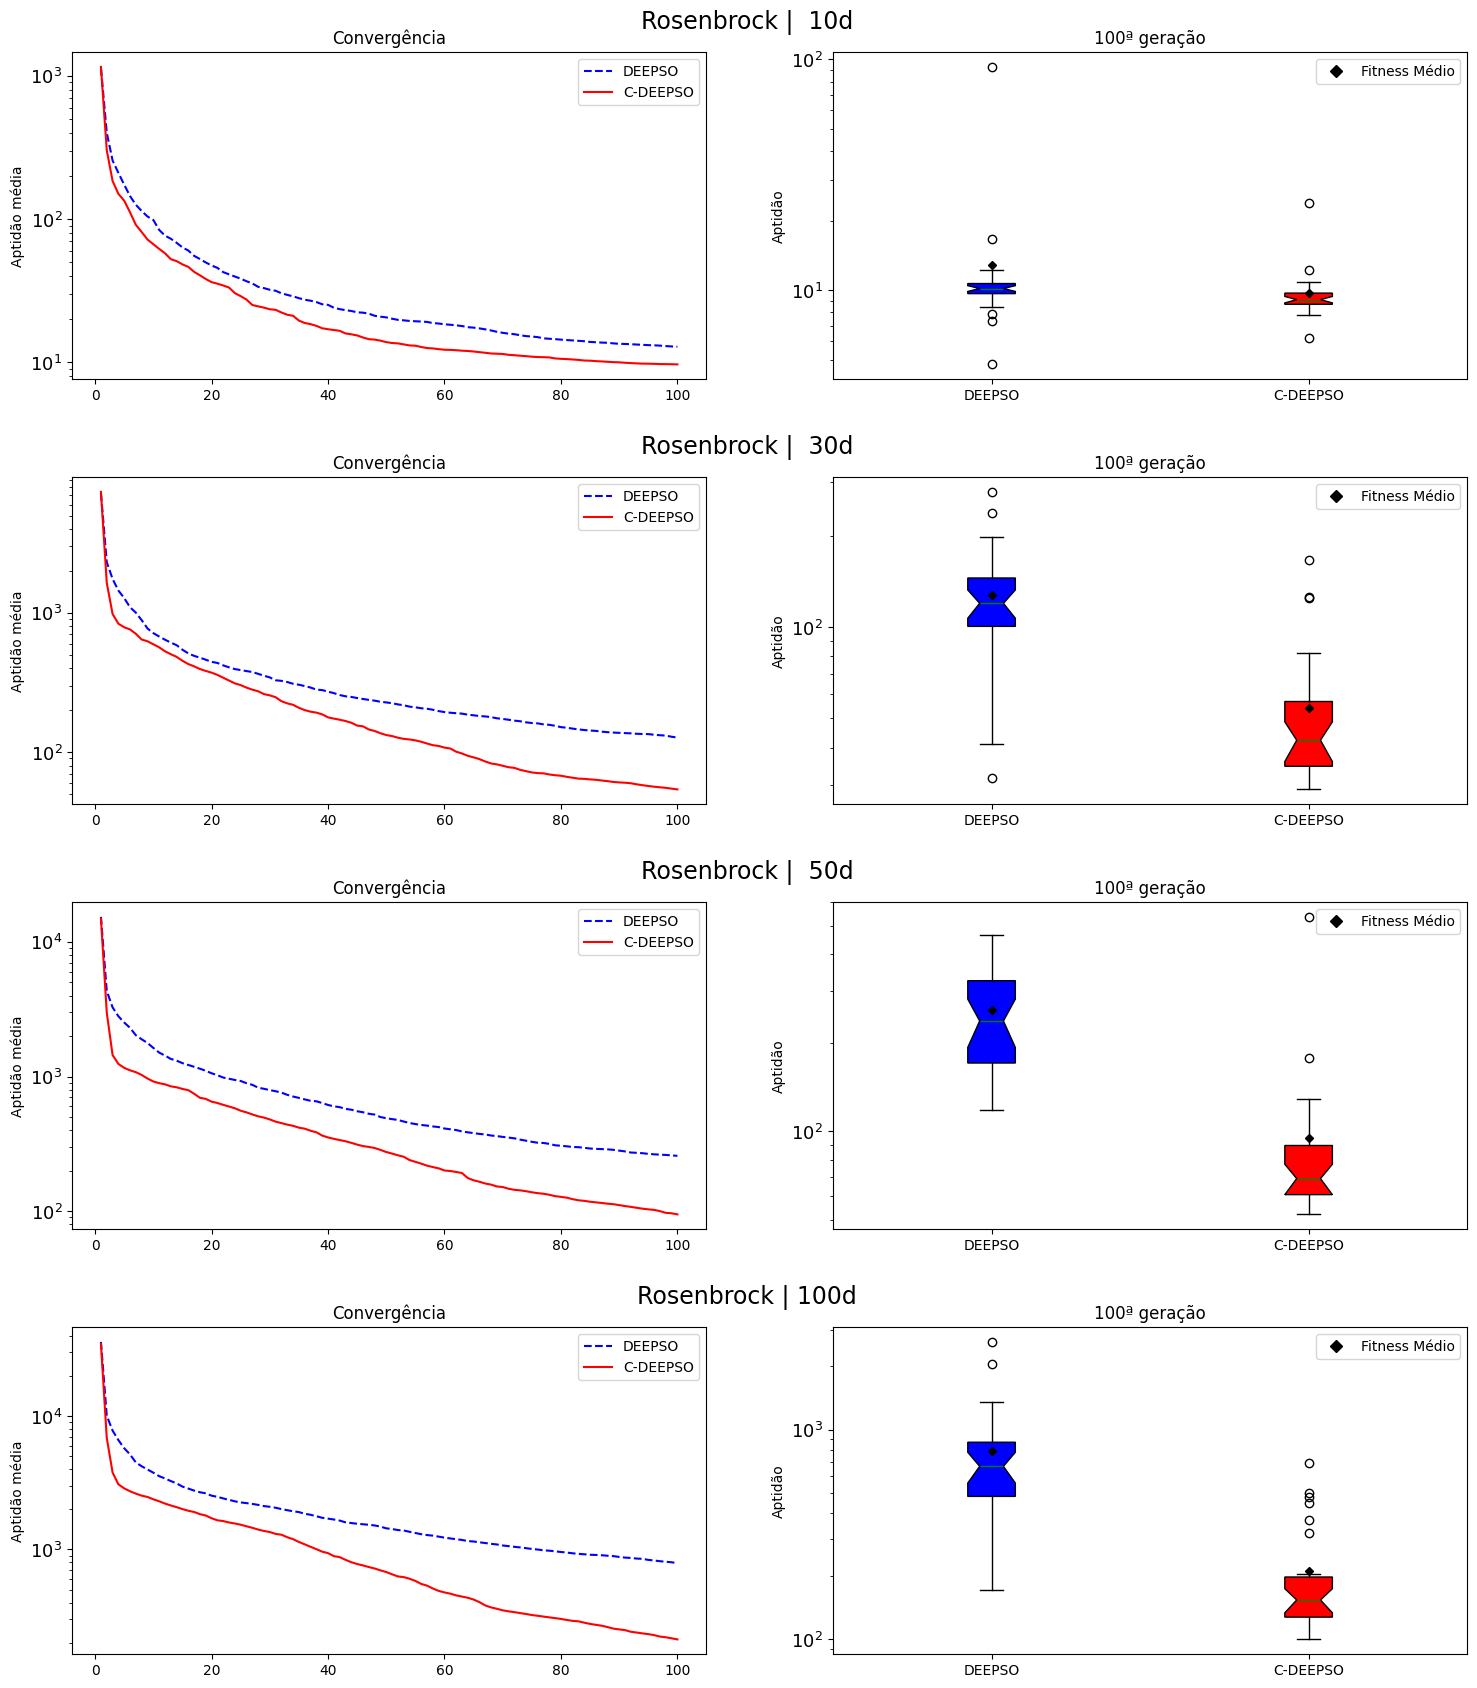

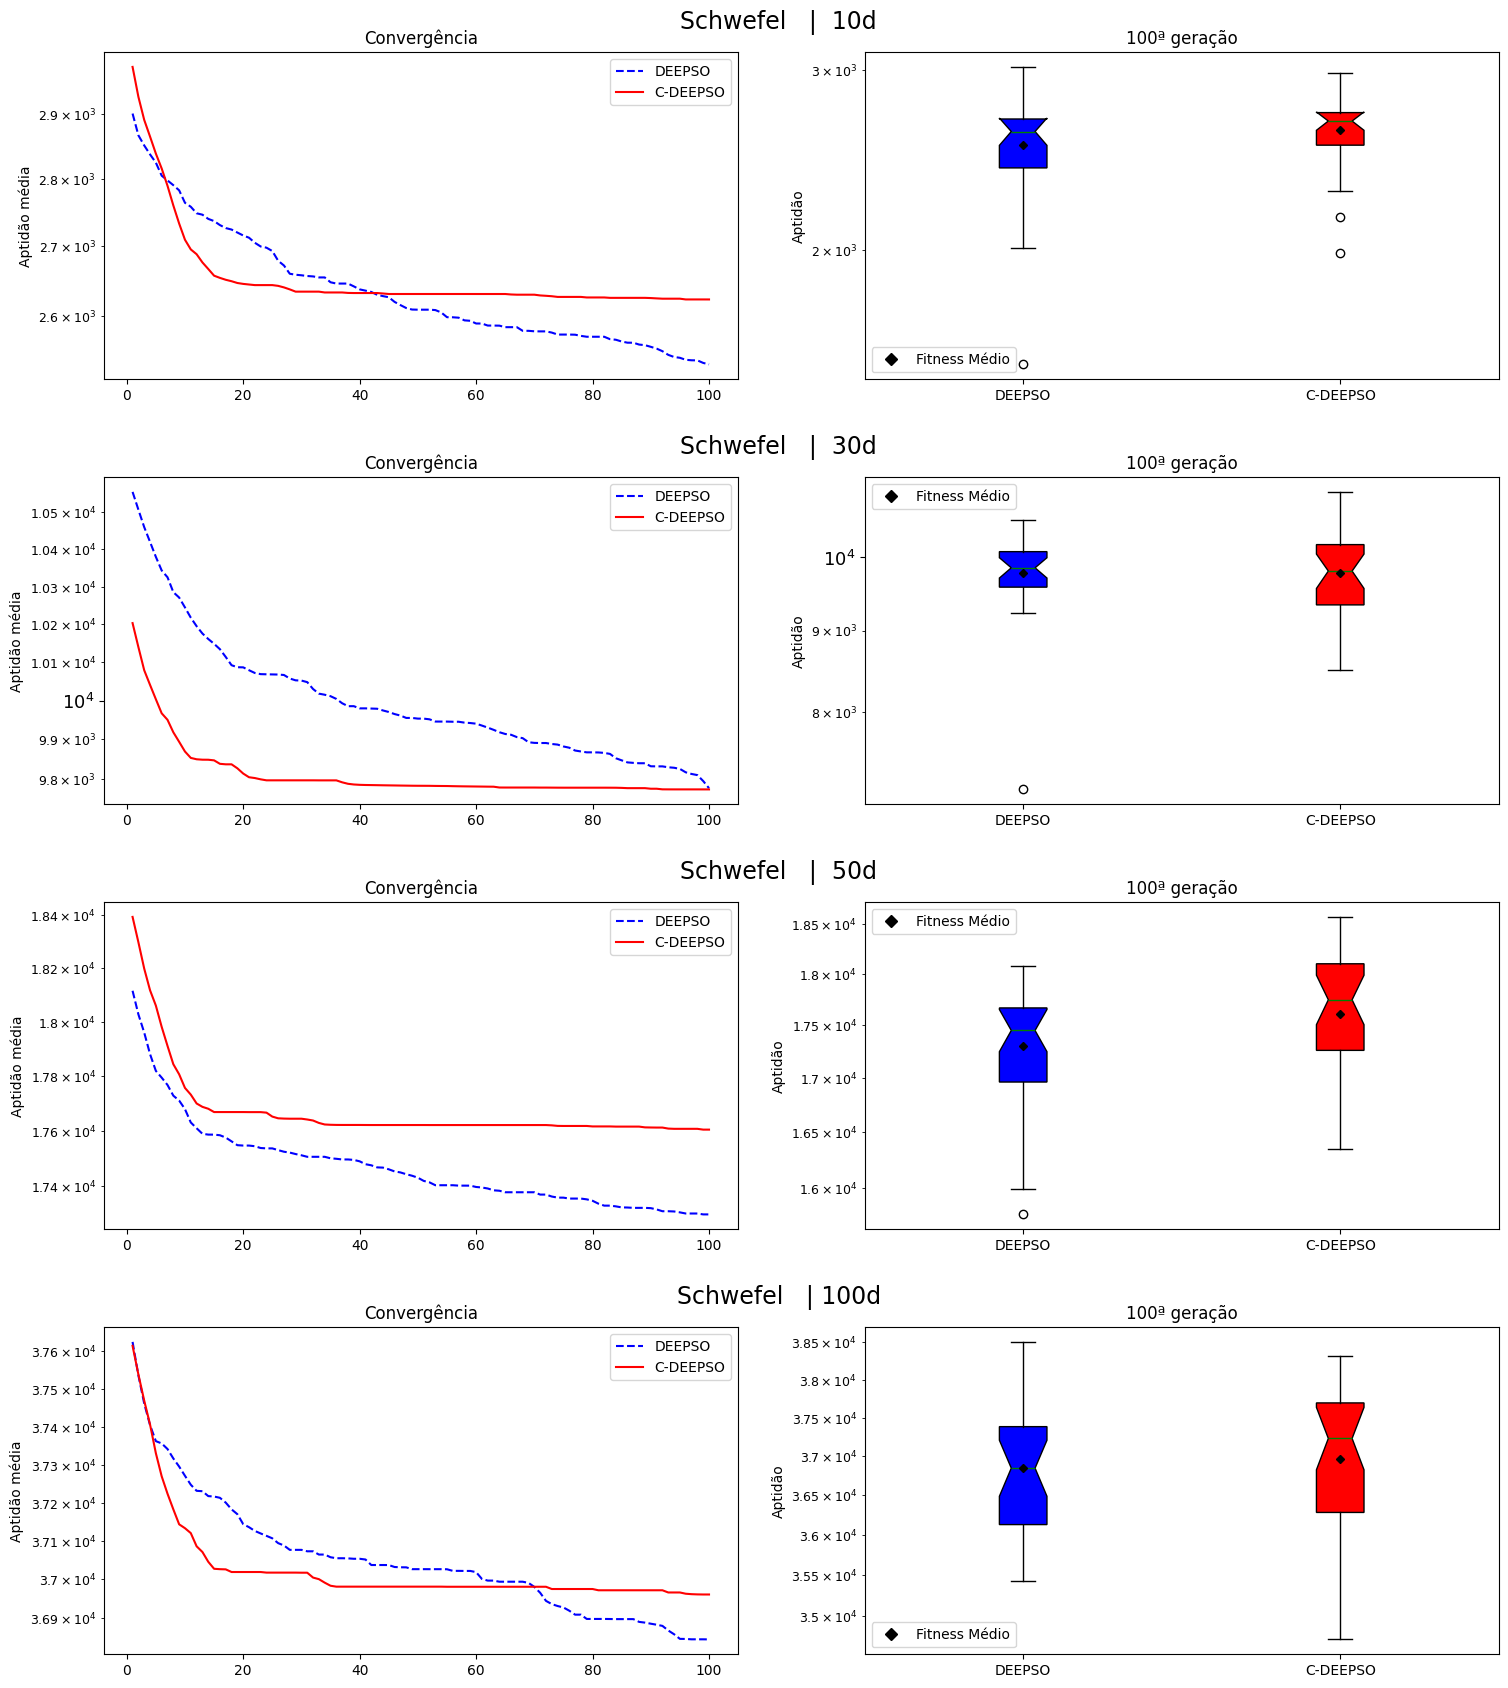

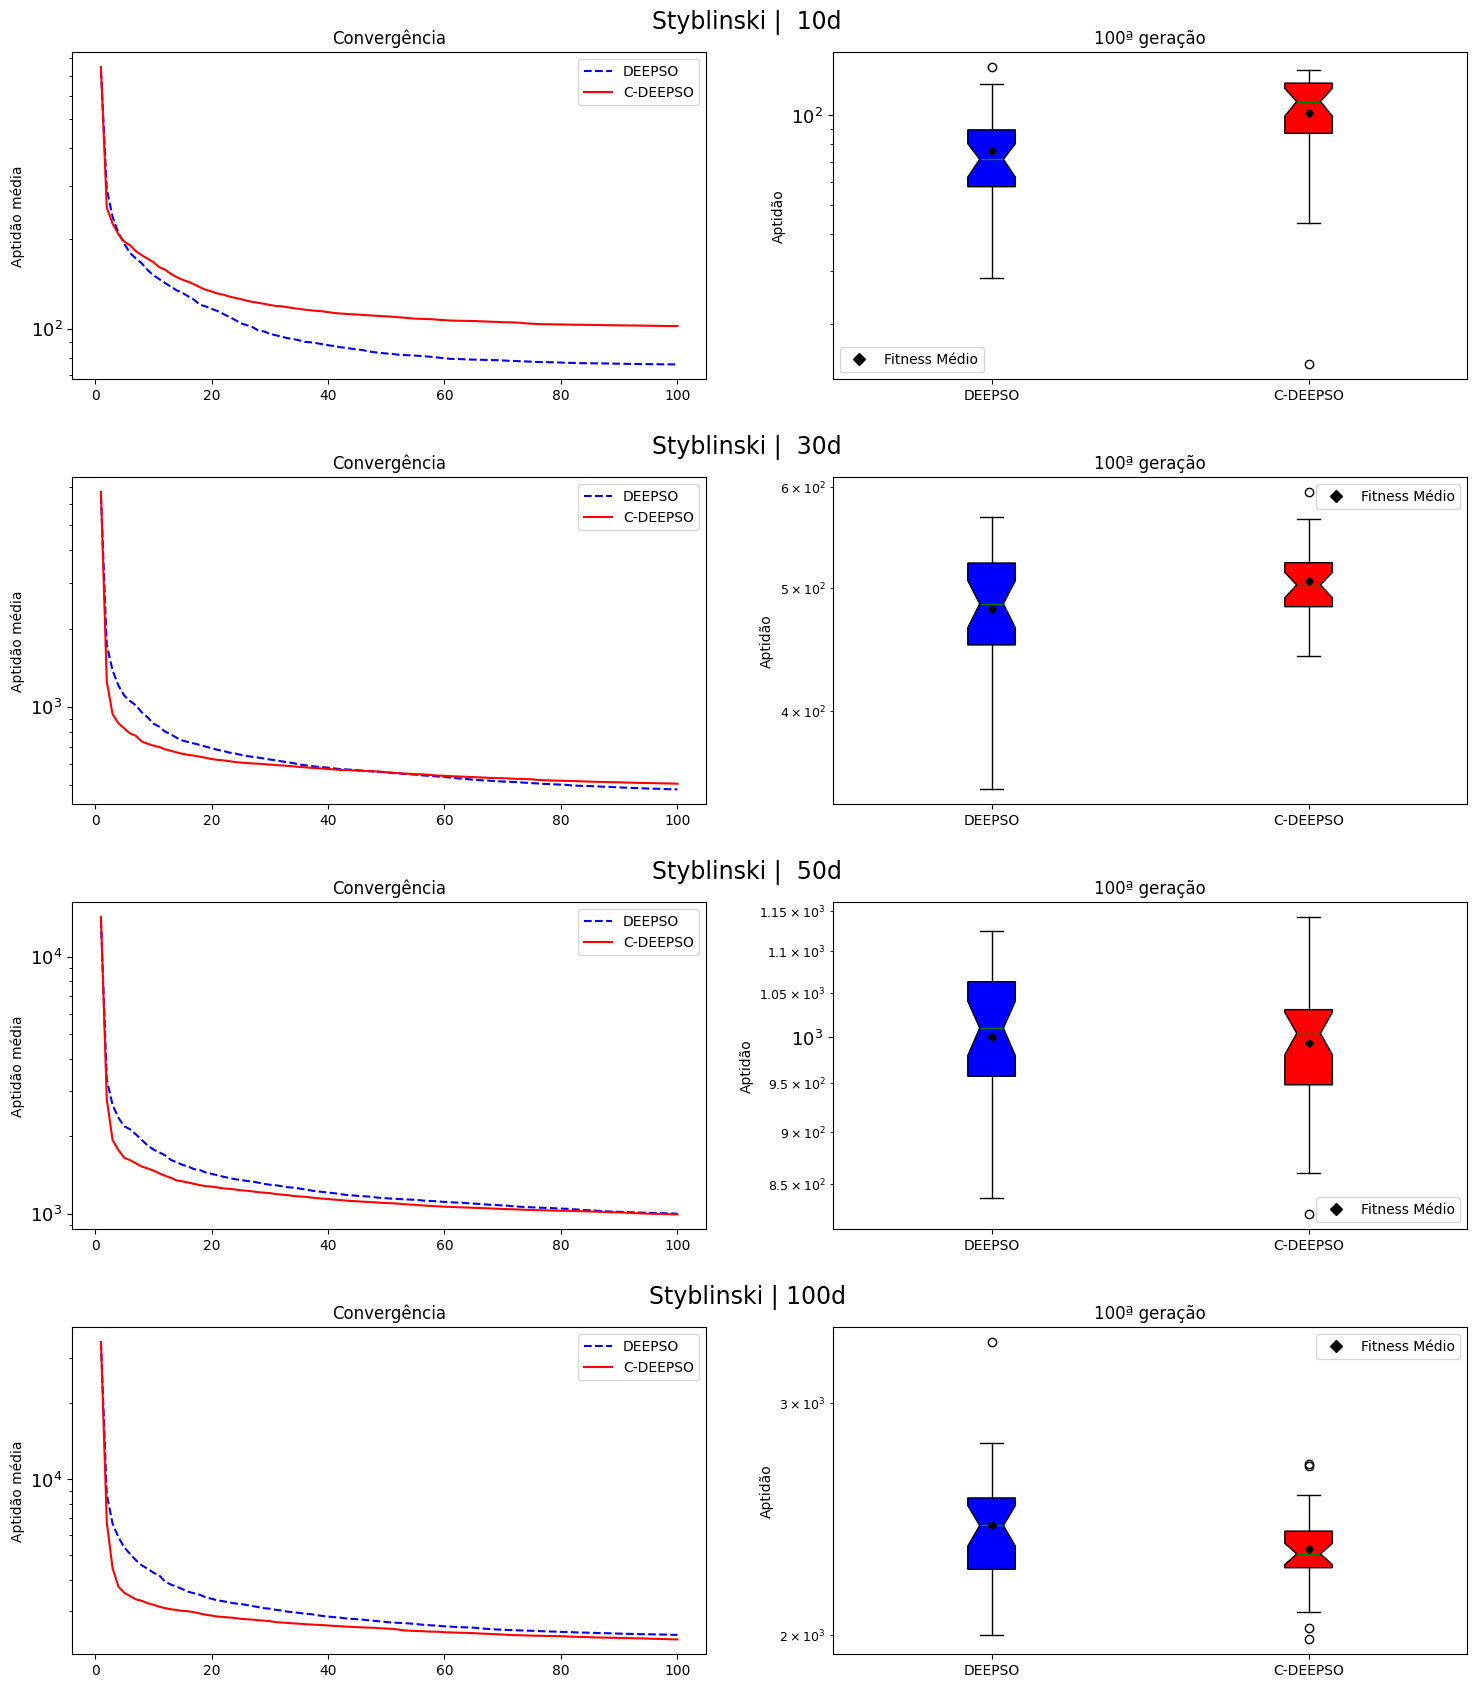

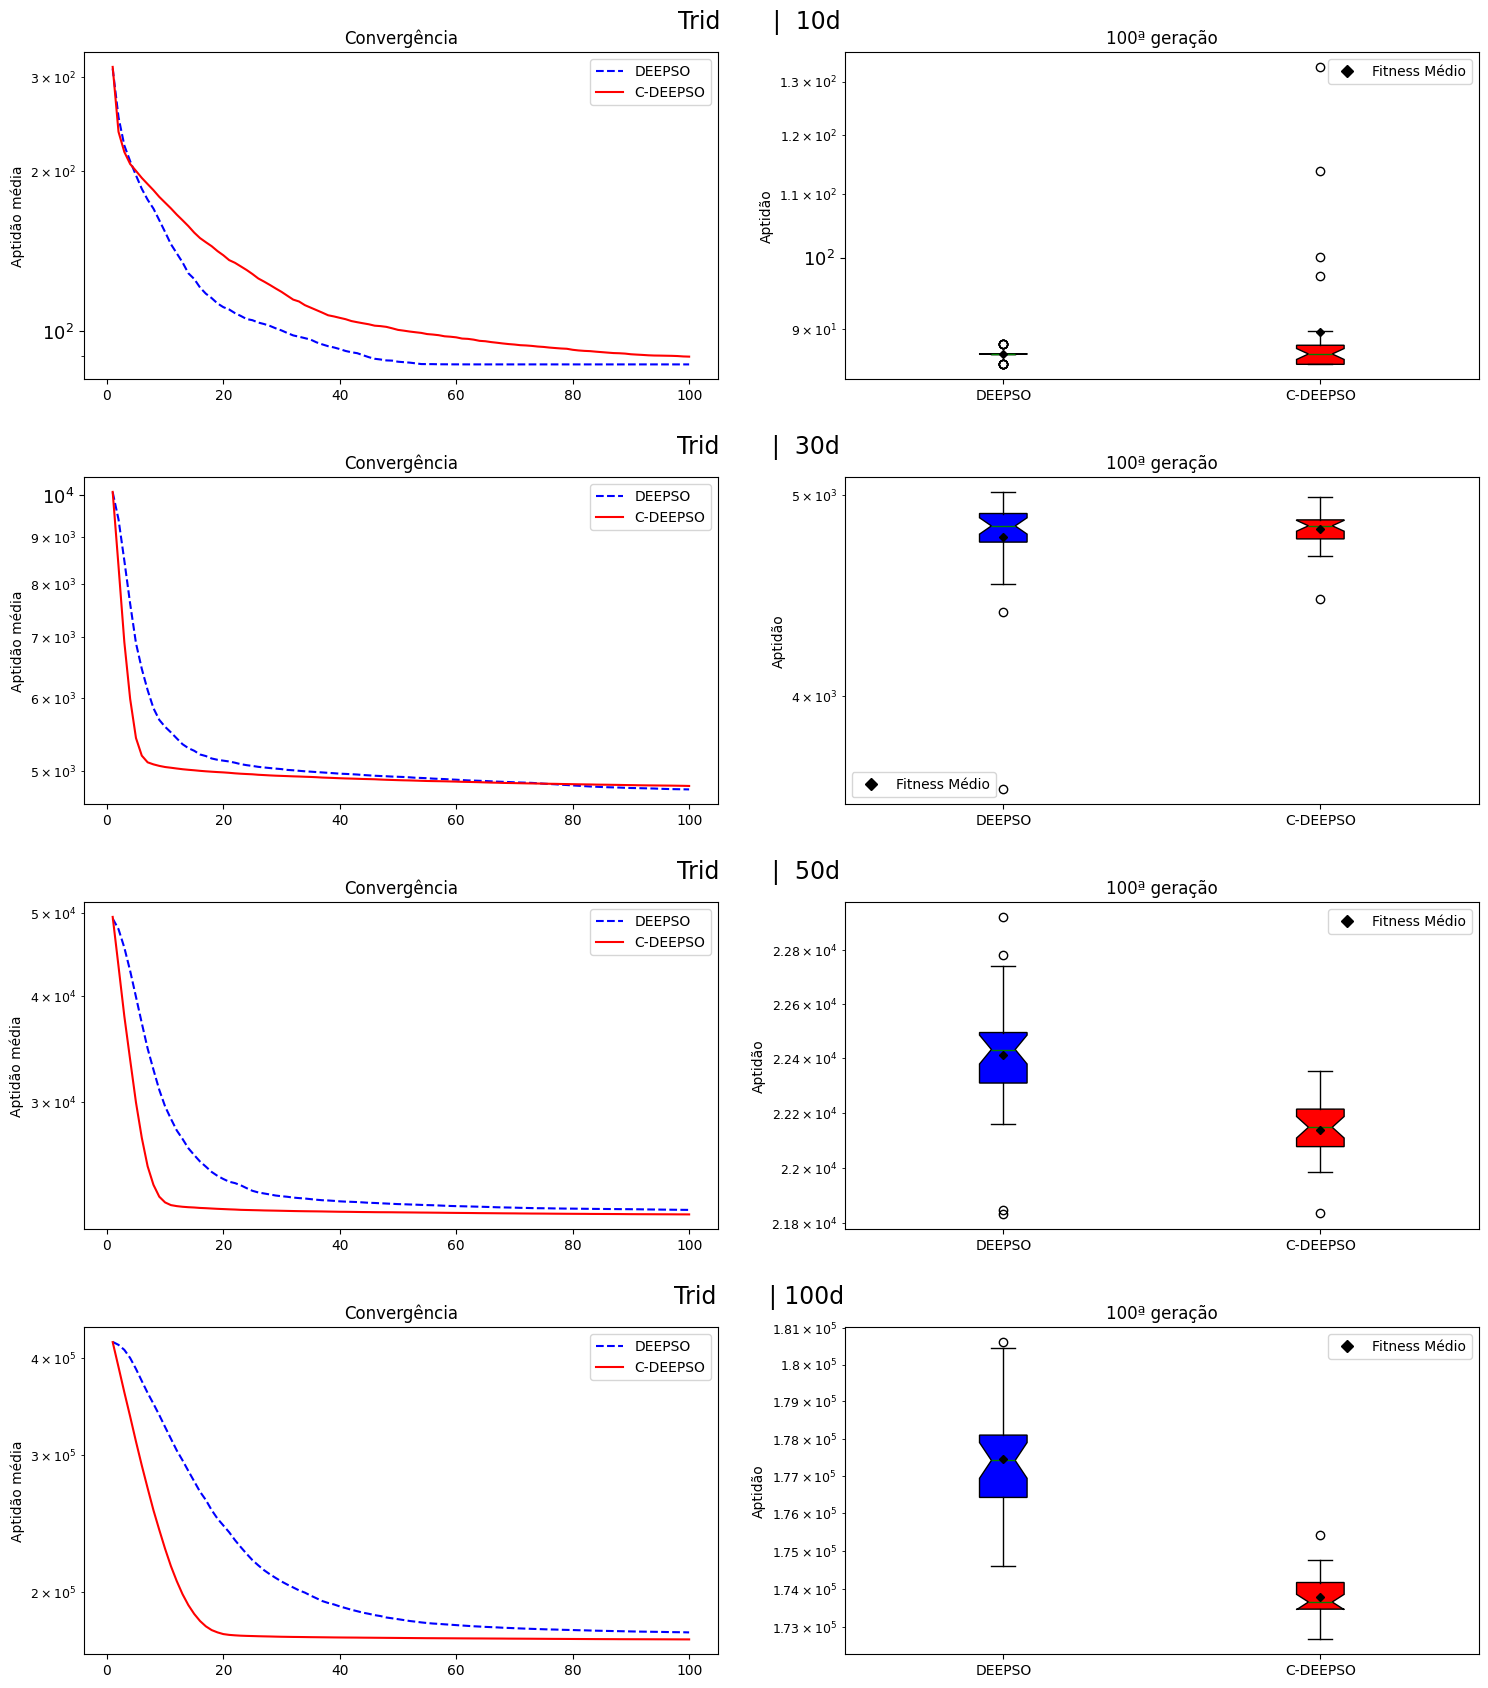

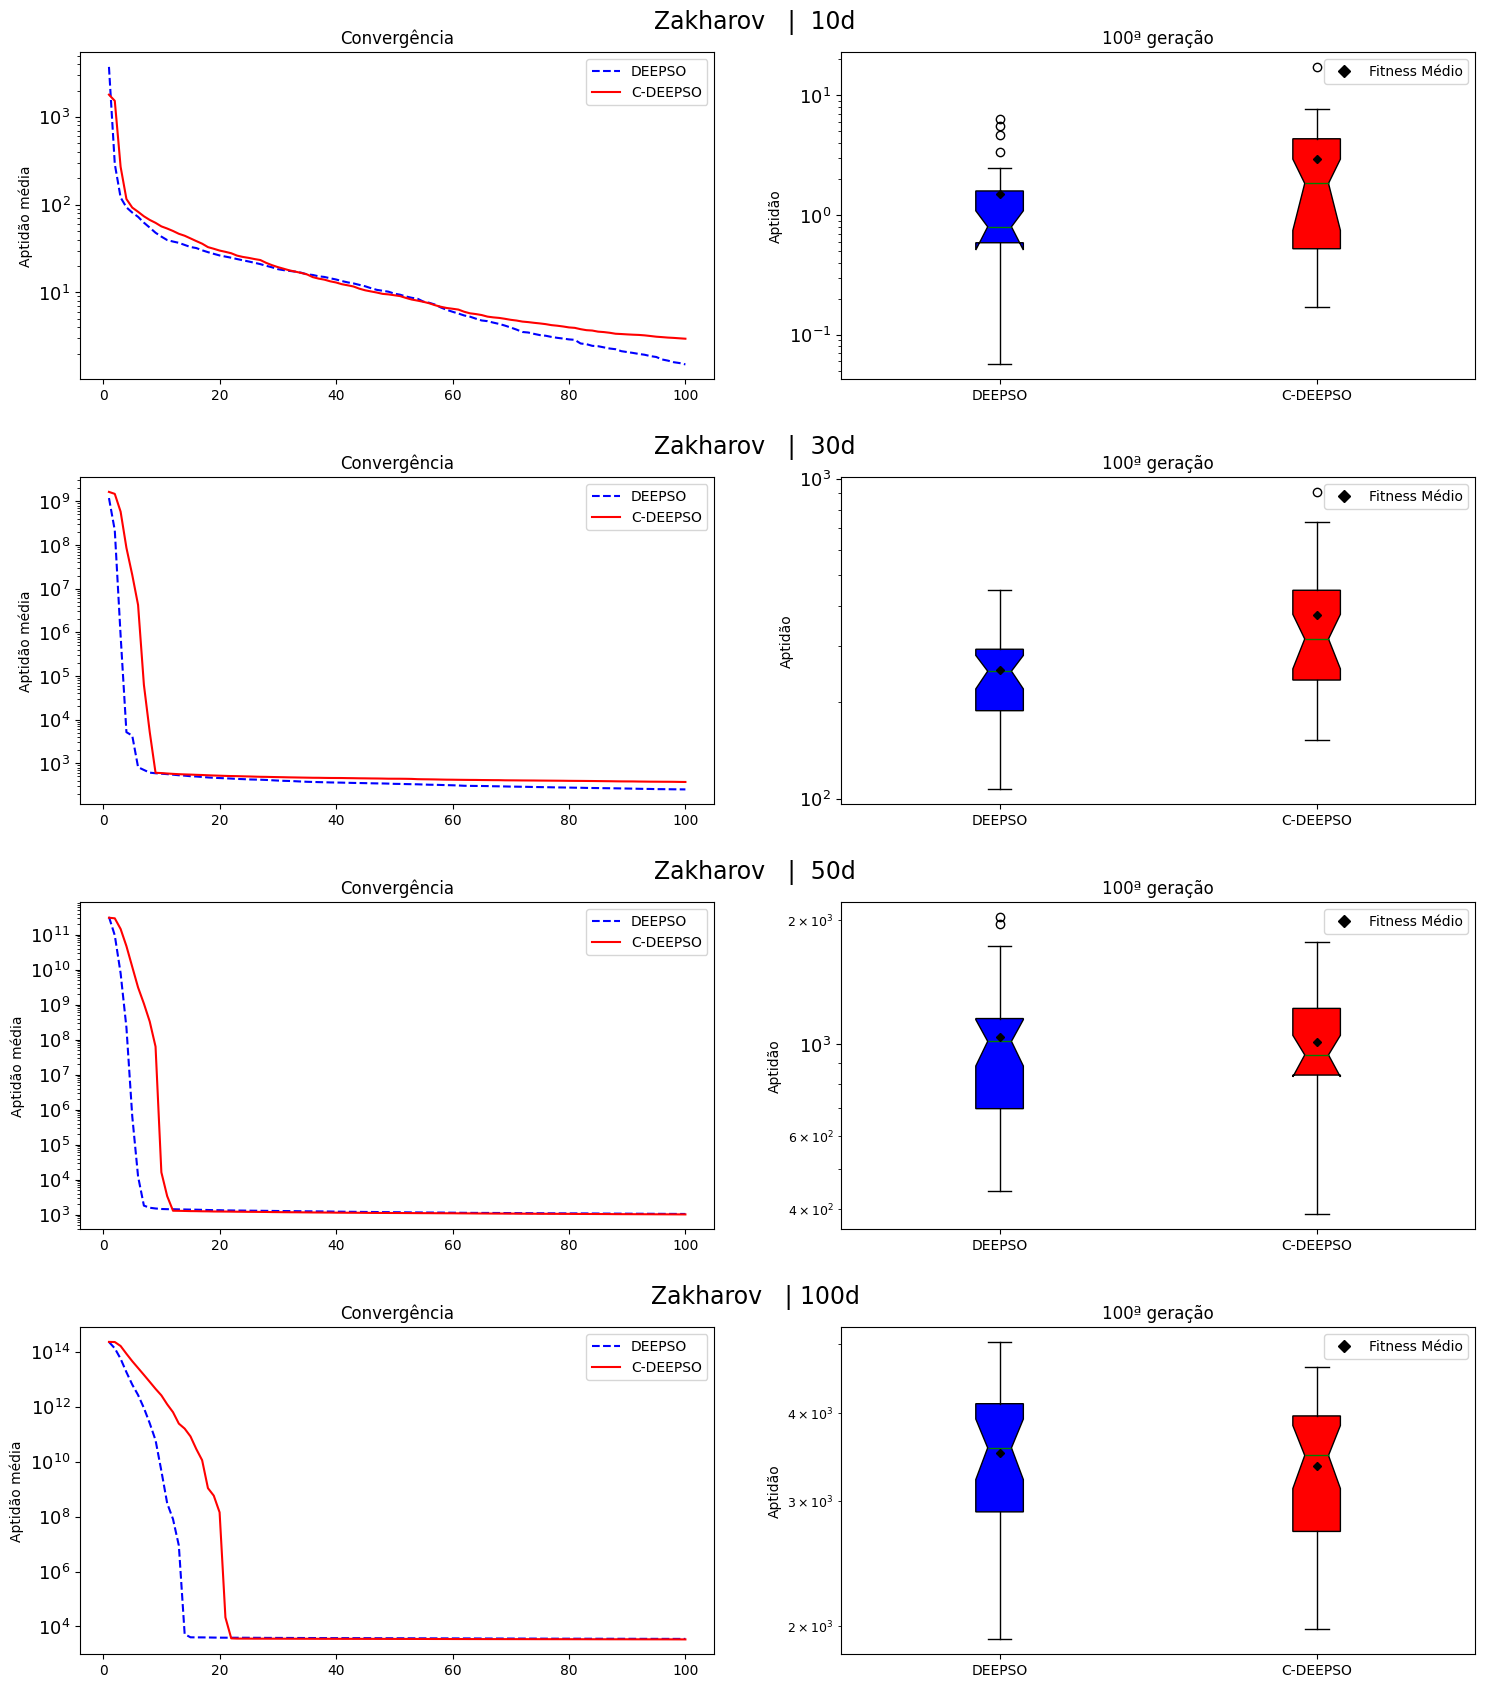

In [3]:
for n in range(len(functions)):
    fig = plt.figure(figsize=(18, 17))
    gs = fig.add_gridspec(4)
    for i in range(len(dims)):
        sub = fig.add_subfigure(gs[i])
        sub.suptitle(tests[n * len(dims) + i].title, fontsize=17)

        sub_gs = sub.add_gridspec(1, 2)
        ax1 = sub.add_subplot(sub_gs[0])
        ax2 = sub.add_subplot(sub_gs[1])

        tests[n * len(dims) + i].plot_mean_convergence(ax1, ['--b', '-r'])
        tests[n * len(dims) + i].boxplot_results(ax2, 99)

        ax1.set_yscale("log")
        ax1.yaxis.set_tick_params('major', labelsize=13)
        ax1.yaxis.set_tick_params('minor', labelsize=9)
        ax2.set_yscale("log")
        ax2.yaxis.set_tick_params('major', labelsize=13)
        ax2.yaxis.set_tick_params('minor', labelsize=9)

    plt.show()
    plt.close(fig)